# Análisis exploratorio de datos

- Conocer el dataset
- Que valores a trabajar


In [147]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [148]:
df = pd.read_csv('../datasets/stroke.csv')

In [4]:
df.head(2)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1


In [7]:
print("Tipos de datos", df.dtypes) # devuelve el tipo de dato de cada feature (columna)

Tipos de datos id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object


In [9]:
print("El dataset tiene {} filas y {} columnas".format(df.shape[0],df.shape[1]))

El dataset tiene 5110 filas y 12 columnas


## Hipotesis
- El estado civil puede influir en el riesgo de stroke
- El tabaquismo es un factor de riesgo de stroke
- La hipertension es un factor de riesgo significativo para el stroke
- Las personas que viven en zonas rurales tienen un mayor riesgo de stroke que las que viven en zonas urbanas

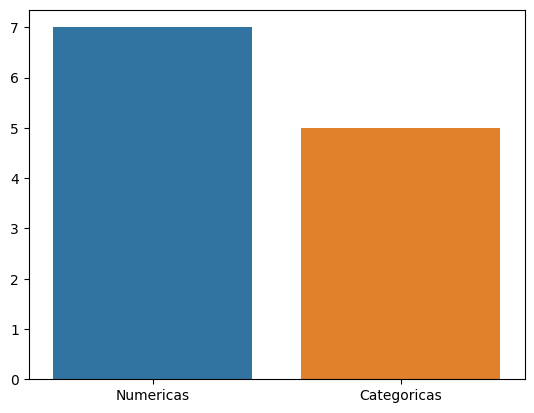

In [18]:
numeric_features = df.select_dtypes(exclude='object').columns
numeric_features = len(numeric_features)
categorical_features = df.select_dtypes(include='object').columns
categorical_features = len(categorical_features)
sns.barplot(x=['Numericas', 'Categoricas'], y=[numeric_features,categorical_features])
plt.show()

In [35]:
stroke_len = len(df[df['stroke'] == 1])
nostroke_len = len(df[df['stroke'] == 0])
print("Proporcion de no stroke vs stroke", (stroke_len / nostroke_len) * 100)

Proporcion de no stroke vs stroke 5.122402797778235


## Clases desbalanceadas

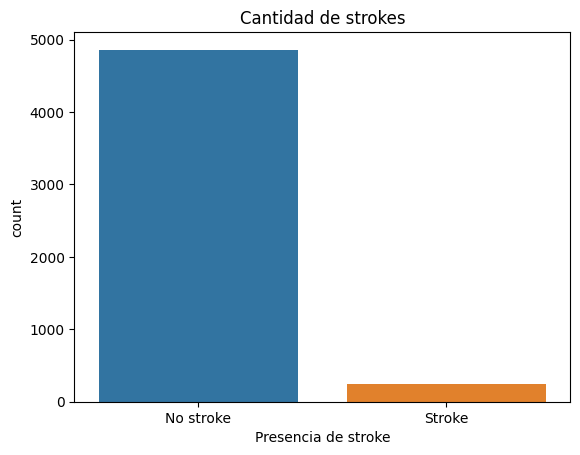

In [36]:
sns.countplot(data=df,x='stroke')
plt.xticks([0,1],["No stroke","Stroke"])
plt.xlabel("Presencia de stroke")
plt.title("Cantidad de strokes")
plt.show()

In [49]:
print("Valores nulos de nuestros features")
df.isnull().sum()
# bmi -> indice de masa corporal

Valores nulos de nuestros features


id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [50]:
df['bmi'].describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

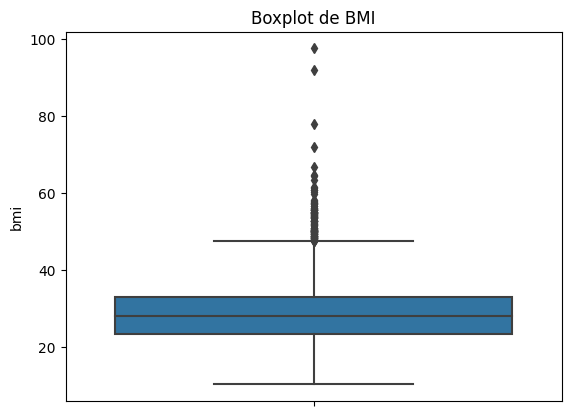

In [55]:
sns.boxplot(data=df, y='bmi')
plt.title("Boxplot de BMI")
plt.show()

<AxesSubplot: xlabel='bmi', ylabel='Count'>

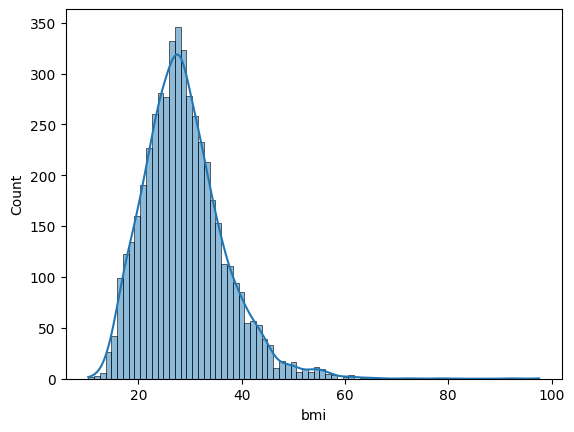

In [56]:
sns.histplot(data=df, x='bmi', kde=True)

In [59]:
df['bmi'].fillna(df['bmi'].median(), inplace=True) # reemplazamos los NaN por la mediana de esa columa y lo hacemos en el df original

In [61]:
df.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [64]:
df.sample(3)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3535,29792,Female,49.0,0,0,Yes,Private,Rural,85.23,25.4,Unknown,0
3830,29419,Female,32.0,0,0,Yes,Private,Urban,81.92,38.0,never smoked,0
2142,29014,Female,23.0,0,0,Yes,Private,Rural,77.73,19.2,never smoked,0


In [65]:
from scipy.stats import iqr

In [69]:
rango_intercuartil = iqr(df['bmi'])
print(rango_intercuartil)

8.999999999999996


In [73]:
print("Datos unicos por genero")
df['gender'].unique()

Datos unicos por genero


array(['Male', 'Female', 'Other'], dtype=object)

<AxesSubplot: xlabel='gender', ylabel='count'>

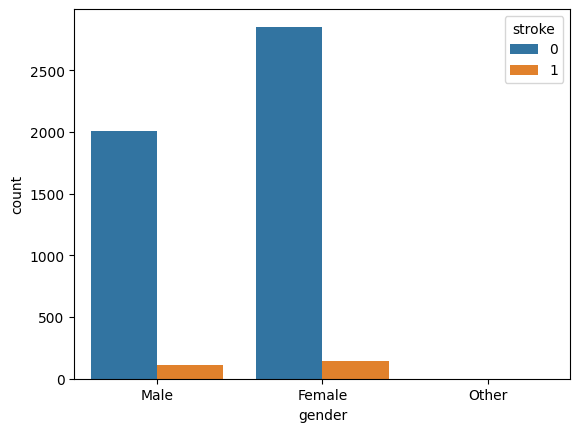

In [80]:
sns.countplot(data=df,x='gender', hue='stroke')

In [82]:
print("Trabajos unicos", df['work_type'].unique())

Trabajos unicos ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']


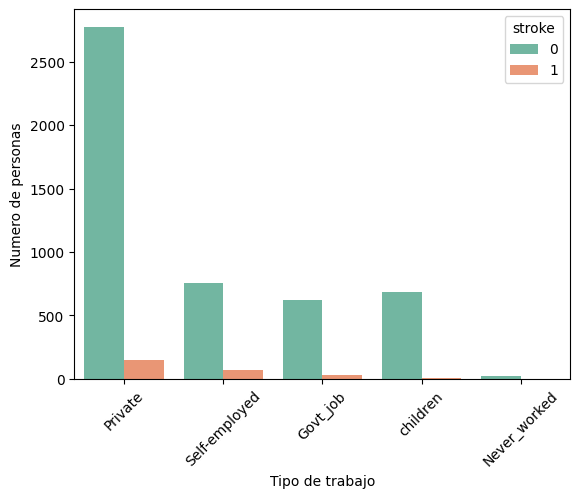

In [87]:
sns.countplot(data=df, x='work_type', hue='stroke', palette="Set2")
plt.xlabel("Tipo de trabajo")
plt.ylabel("Numero de personas")
plt.xticks(rotation=45)
plt.show()

In [94]:
# Nivel de glucosa

df['avg_glucose_level'].describe()

count    5110.000000
mean      106.147677
std        45.283560
min        55.120000
25%        77.245000
50%        91.885000
75%       114.090000
max       271.740000
Name: avg_glucose_level, dtype: float64

In [95]:
df.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

<AxesSubplot: ylabel='avg_glucose_level'>

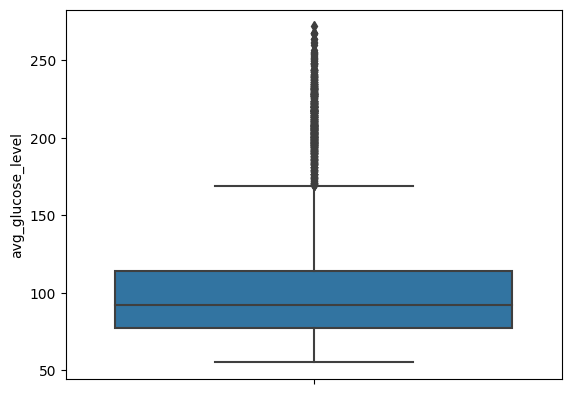

In [92]:
sns.boxplot(data=df, y='avg_glucose_level')

<AxesSubplot: xlabel='avg_glucose_level', ylabel='Count'>

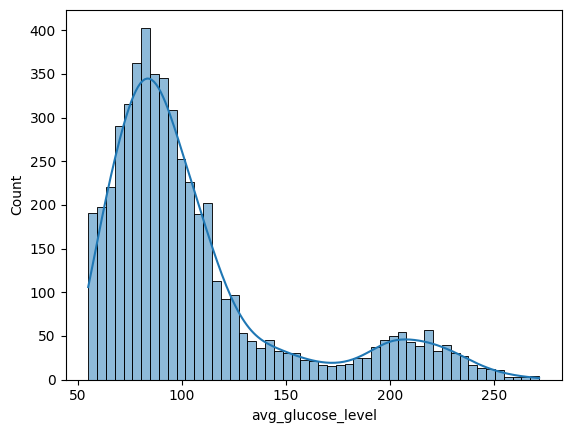

In [96]:
sns.histplot(data=df,x='avg_glucose_level',kde=True)

<AxesSubplot: xlabel='ever_married', ylabel='count'>

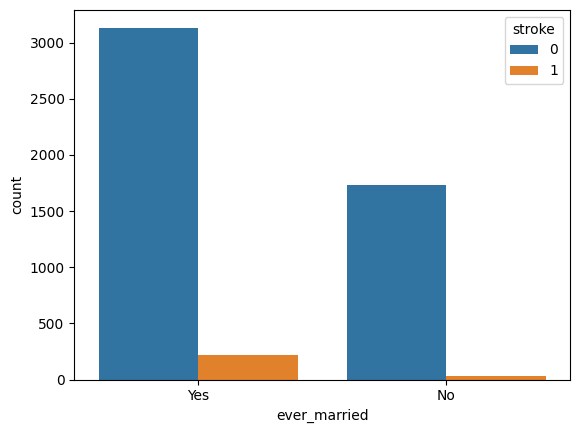

In [98]:
sns.countplot(data=df,x='ever_married', hue='stroke')

## Covarianza y correlación


$Var(X) = \frac{\Sigma_{i=1} (x_i - \bar{x})^2}{N}$

$Cov(X,Y) = 1/n * \Sigma_{i=1}(x_i - \bar{x})(y_i - \bar{y})$

## Coeficiente de correlación de pearson 

$pxy = \frac{Cov(X,Y)}{\sqrt{Var(X) Var(Y)}}$

P(X=edad,Y=ingreso) = 0.8

In [100]:
df.sample(1)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
825,33400,Male,59.0,0,0,Yes,Govt_job,Rural,73.75,27.3,smokes,0


<AxesSubplot: >

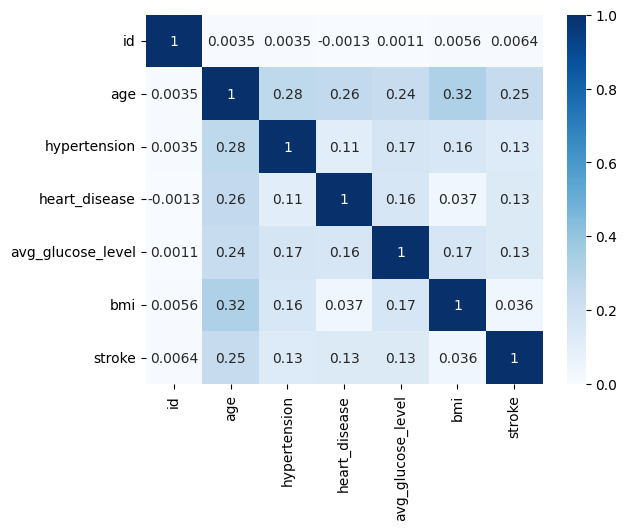

In [103]:
sns.heatmap(df.corr(), annot=True, cmap='Blues')

In [112]:
# Vamos a pasar la columna ever_married a numerica discreta
# get_dummies, OneHotEncoding 
# LabelEncoder() -> Categoricas ordinales

In [114]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [125]:
df = pd.get_dummies(df,columns=['ever_married'], drop_first=True) # drop_first por lo general va true

In [128]:
df.head(2)

,id,gender,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,ever_married_Yes
0,9046,Male,67.0,0,1,Private,Urban,228.69,36.6,formerly smoked,1,1
1,51676,Female,61.0,0,0,Self-employed,Rural,202.21,NaN,never smoked,1,1


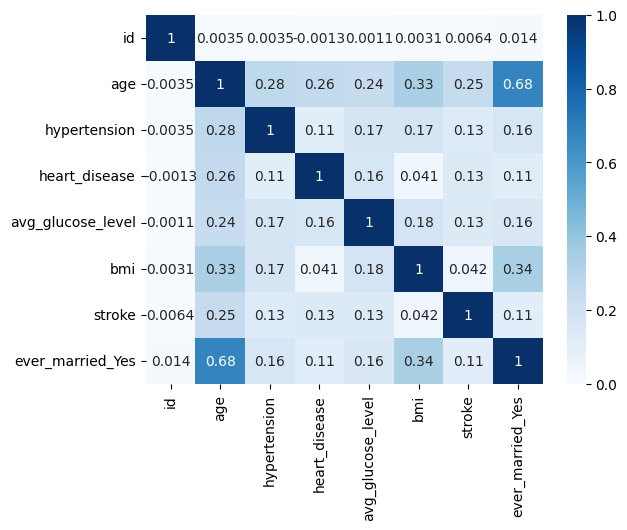

In [132]:
sns.heatmap(df.corr(),annot=True, cmap='Blues')
plt.show()

In [134]:
Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)
iqr = Q3 - Q1

In [135]:
umbral_superior = Q3 + 1.5 * iqr
umbral_inferior = Q1 - 1.5 * iqr

In [144]:
outliers = df[(df['bmi'] > umbral_superior) | (df['bmi'] < umbral_inferior)]
outliers.head()

,id,gender,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,ever_married_Yes
21,13861,Female,52.0,1,0,Self-employed,Urban,233.29,48.9,never smoked,1,1
113,41069,Female,45.0,0,0,Private,Rural,224.10,56.6,never smoked,1,1
254,32257,Female,47.0,0,0,Private,Urban,210.95,50.1,Unknown,0,1
258,28674,Female,74.0,1,0,Self-employed,Urban,205.84,54.6,never smoked,0,1
270,72911,Female,57.0,1,0,Private,Rural,129.54,60.9,smokes,0,1


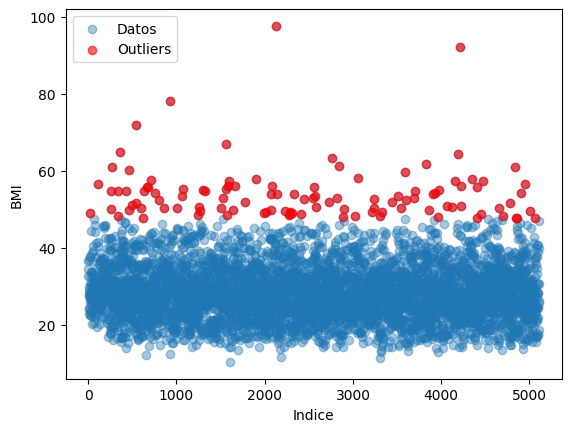

In [145]:
plt.scatter(df.index, df['bmi'], label="Datos", alpha=0.4)
plt.scatter(outliers.index, outliers['bmi'], color='red', alpha=0.6, label="Outliers")
plt.xlabel("Indice")
plt.ylabel("BMI")
plt.legend()
plt.show()

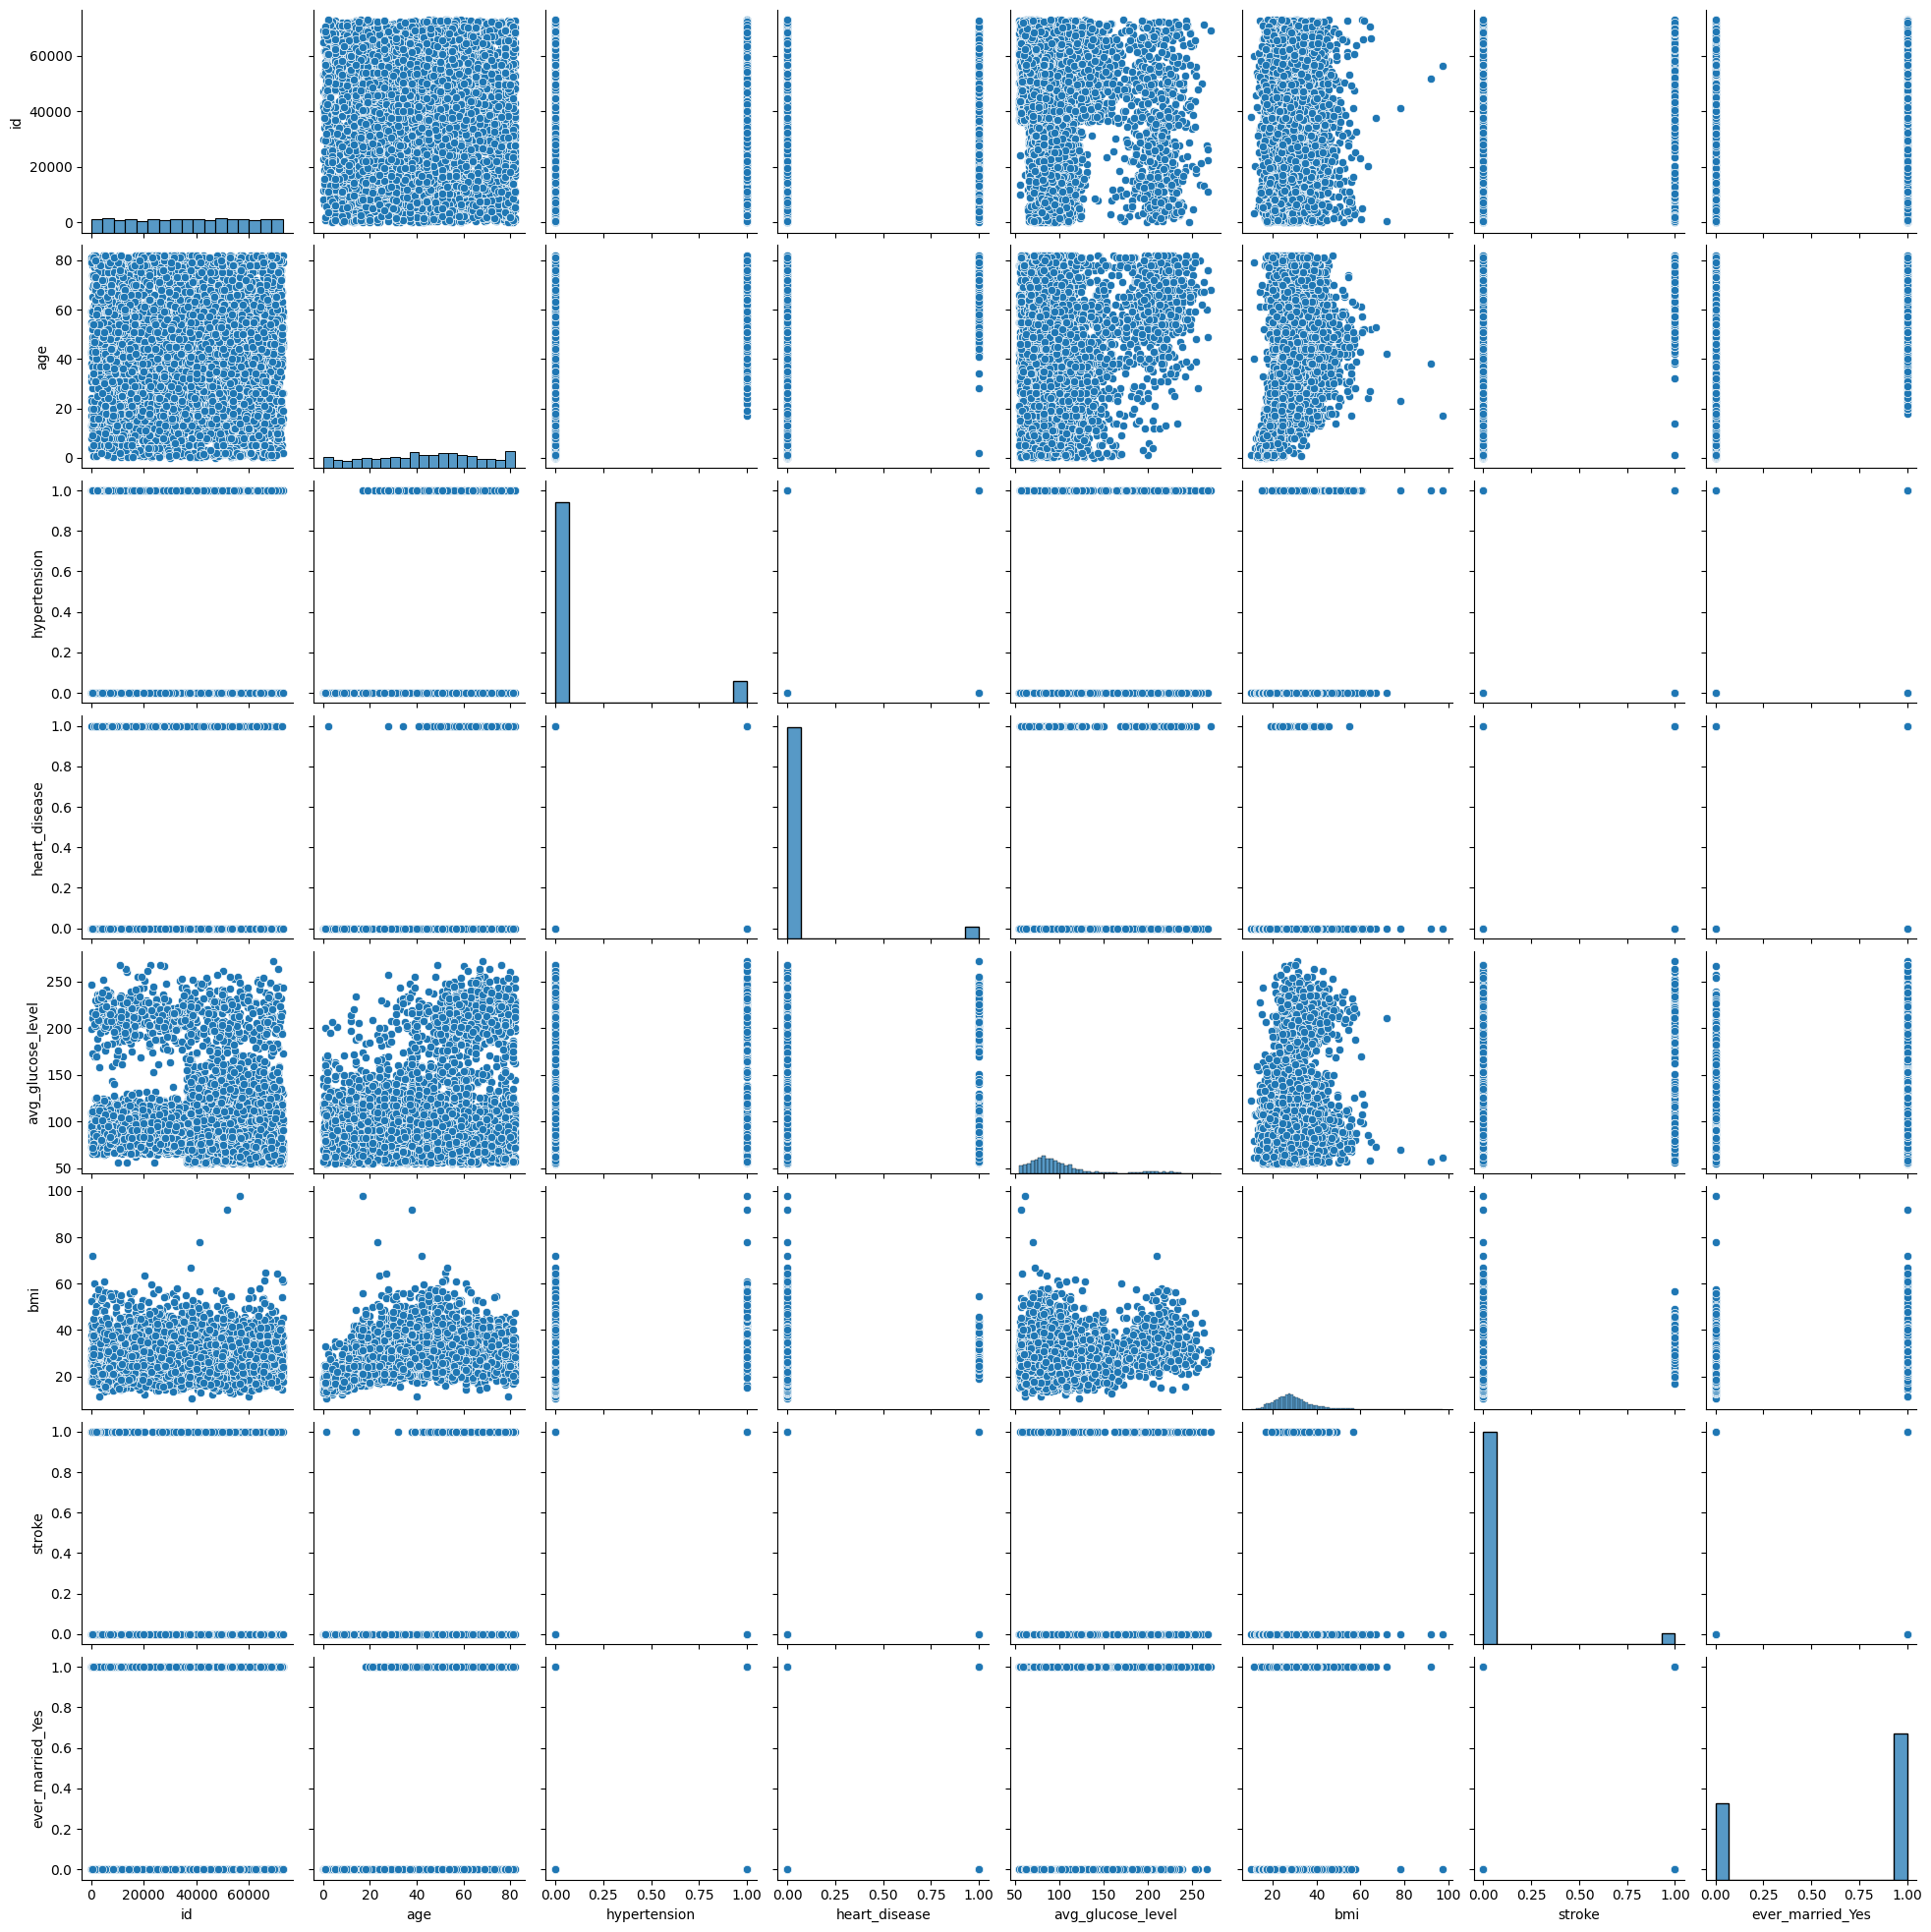

In [146]:
sns.pairplot(df)